In [49]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge  # noqa F401
from sklearn.metrics import mean_absolute_error 
from sklearn.pipeline import make_pipeline
from sklearn.utils.validation import check_is_fitted
from mpl_toolkits.mplot3d import Axes3D
warnings.simplefilter(action="ignore", category=FutureWarning)


In [50]:
def wrangle(filepath):
    df = pd.read_csv(filepath)
#Drop null columns
    df.drop(columns=["Race","Education"],inplace=True)
#Drop low and high cardinality
    df.drop(columns=["timestamp","company","level","location","tag","gender","otherdetails"],inplace=True)
#Drop Leaky columns
#Drop multicollinearity
    df.drop(columns=["totalyearlycompensation","stockgrantvalue","bonus","cityid","dmaid","rowNumber","Masters_Degree","Bachelors_Degree","Doctorate_Degree","Highschool","Some_College","Race_Asian","Race_White","Race_Two_Or_More","Race_Black","Race_Hispanic"],inplace=True)
    return df
  

In [51]:
df = wrangle(r"C:\Users\HP\Desktop\New folder\Levels_Fyi_Salary_Data.csv")

<AxesSubplot:>

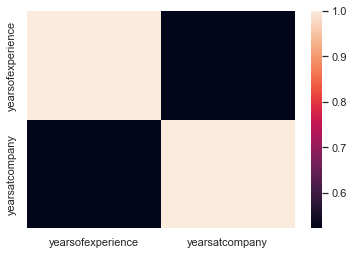

In [52]:
corr=df.select_dtypes("number").drop(columns="basesalary").corr()
sns.heatmap(corr)

In [53]:
df["title"].unique()

array(['Product Manager', 'Software Engineer',
       'Software Engineering Manager', 'Data Scientist',
       'Solution Architect', 'Technical Program Manager',
       'Human Resources', 'Product Designer', 'Marketing',
       'Business Analyst', 'Hardware Engineer', 'Sales', 'Recruiter',
       'Mechanical Engineer', 'Management Consultant'], dtype=object)

In [54]:
df.head()

,title,yearsofexperience,yearsatcompany,basesalary
0,Product Manager,1.5,1.5,107000.0
1,Software Engineer,5.0,3.0,0.0
2,Product Manager,8.0,0.0,155000.0
3,Software Engineering Manager,7.0,5.0,157000.0
4,Software Engineer,5.0,3.0,0.0


In [55]:
df.describe()

,yearsofexperience,yearsatcompany,basesalary
count,62642.000000,62642.000000,6.264200e+04
mean,7.204135,2.702093,1.366873e+05
std,5.840375,3.263656,6.136928e+04
min,0.000000,0.000000,0.000000e+00
25%,3.000000,0.000000,1.080000e+05
50%,6.000000,2.000000,1.400000e+05
75%,10.000000,4.000000,1.700000e+05
max,69.000000,69.000000,1.659870e+06


In [71]:
df.mode(axis=0, numeric_only=True)

,yearsofexperience,yearsatcompany,basesalary
0,5.0,0.0,160000.0


In [72]:
df.median(axis=None, skipna=None)

yearsofexperience         6.0
yearsatcompany            2.0
basesalary           140000.0
dtype: float64

In [73]:
df.title.sort_values()

24435             Business Analyst
41690             Business Analyst
35389             Business Analyst
23127             Business Analyst
31438             Business Analyst
                   ...            
51629    Technical Program Manager
61339    Technical Program Manager
22138    Technical Program Manager
41928    Technical Program Manager
47321    Technical Program Manager
Name: title, Length: 62642, dtype: object

In [74]:
mean1 = df[df.title=="Business Analyst"].basesalary.mean()
mean2 = df[df.title=="Product Manager"].basesalary.mean()
mean3 = df[df.title=="Software Engineer"].basesalary.mean()
mean4 = df[df.title=="Software Engineering Manager"].basesalary.mean()
mean5 = df[df.title=="Data Scientist"].basesalary.mean()
mean6 = df[df.title=="Solution Architect"].basesalary.mean()
mean7 = df[df.title=="Technical Program Manager"].basesalary.mean()
mean8 = df[df.title=="Human Resources"].basesalary.mean()
mean9 = df[df.title=="Product Designer"].basesalary.mean()
mean10 = df[df.title=="Marketing"].basesalary.mean()
mean11 = df[df.title=="Hardware Engineer"].basesalary.mean()
mean12 = df[df.title=="Sales"].basesalary.mean()
mean13 = df[df.title=="Recruiter"].basesalary.mean()
mean14 = df[df.title=="Mechanical Engineer"].basesalary.mean()
mean15 = df[df.title=="Management Consultant"].basesalary.mean()
print([mean1, mean2, mean3, mean4, mean5, mean6, mean7, mean8, mean9, mean10, mean11, mean12, mean13, mean14, mean15])

[103505.08474576271, 148663.56216563235, 132414.62368121074, 174204.4690389465, 138054.69356089993, 140173.50907519448, 156454.74293989863, 128590.65934065935, 137163.58839050133, 140957.74647887325, 139628.18181818182, 118470.715835141, 117496.67405764967, 118455.10204081633, 136195.69672131148]


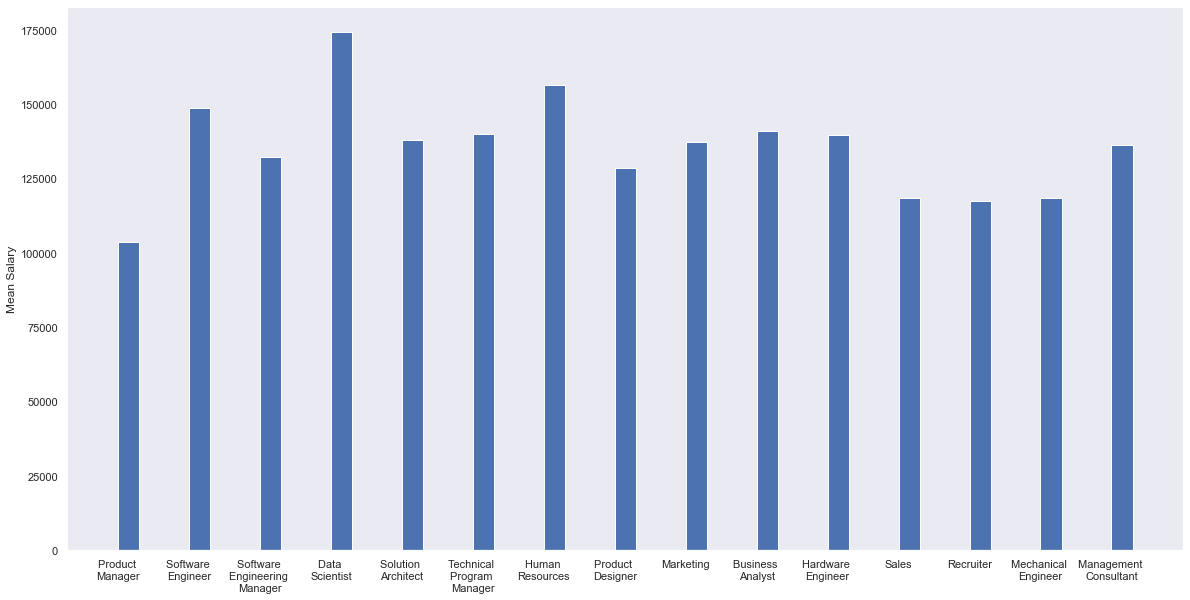

In [80]:
meanlist = [mean1, mean2, mean3, mean4, mean5, mean6, mean7, mean8, mean9, mean10, mean11, mean12, mean13, mean14, mean15]
salarylist = ['Product \nManager', 'Software \nEngineer',
       'Software \nEngineering \nManager', 'Data \nScientist',
       'Solution \nArchitect', 'Technical \nProgram \nManager',
       'Human \nResources', 'Product \nDesigner', 'Marketing',
       'Business \nAnalyst', 'Hardware \nEngineer', 'Sales', 'Recruiter',
       'Mechanical \nEngineer', 'Management \nConsultant']
plt.figure(figsize=(20, 10))
plt.grid()
plt.ylabel("Mean Salary")
plt.bar(salarylist, meanlist, align="edge", width=0.3);


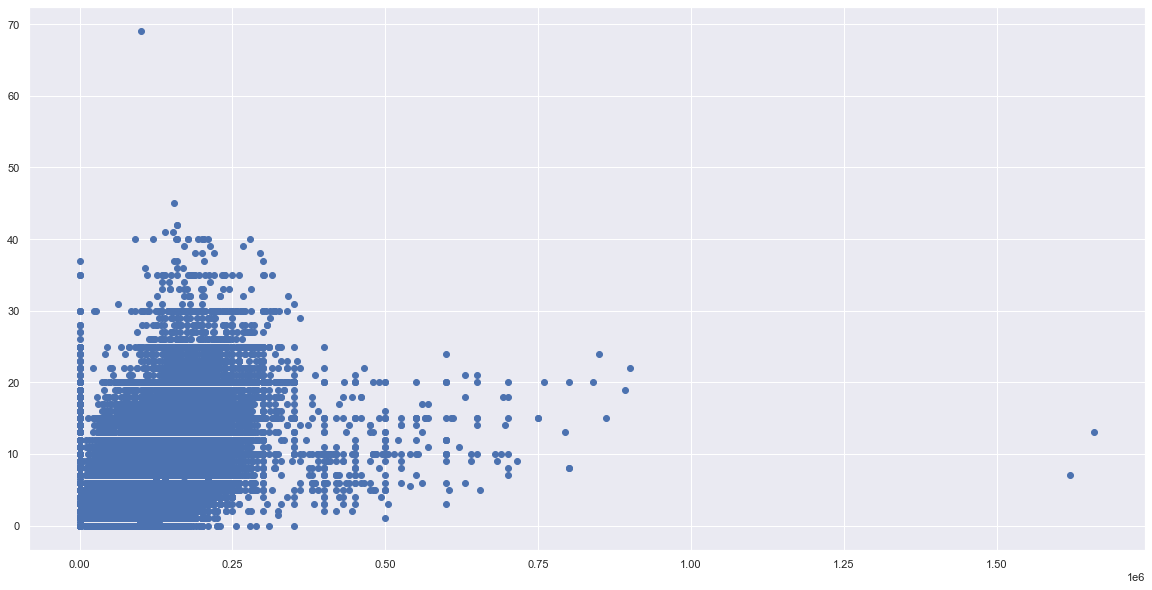

In [79]:
plt.figure(figsize=(20, 10))
# plt.xlabel()
plt.scatter(df.basesalary, df.yearsofexperience);

In [78]:
#Split Data
target ="basesalary"
features = ["yearsofexperience","yearsatcompany","title"]
X_train = df[features]
y_train = df[target]

In [57]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean]*len(y_train)
print("mean salary:",round(y_mean,2))
print("MAE Baseline:",round(mean_absolute_error(y_train,y_pred_baseline),2))

mean salary: 136687.28
MAE Baseline: 43392.03


In [59]:
model = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(),
    LinearRegression()
)
model.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder()),
                ('simpleimputer', SimpleImputer()),
                ('linearregression', LinearRegression())])

In [60]:
y_pred_training = model.predict(X_train)
print("MAE training:",round(mean_absolute_error(y_train,y_pred_training),2))

MAE training: 37903.96


In [61]:
intercept = round(model.named_steps["linearregression"].intercept_ , 2)
intercept

152537.46

In [62]:
coefficients = model.named_steps["linearregression"].coef_.round(2)
coefficients[:17]


array([-73901.46, -64854.38, -24146.22, -78905.67, -15608.18, -70070.97,
       -46213.1 , -64714.04,    220.67, -36562.19,  56348.71, -53890.8 ,
       -29119.85, -46303.5 , -55801.5 , -37984.11, -39589.47])

In [67]:
def make_prediction(experience, atcompany, title):
    data = {
        "yearsofexperience": experience,
        "yearsatcompany": atcompany,
        "title": title
    }
    df = pd.DataFrame(data,index=[0])
    prediction = model.predict(df).round(2)[0]
    return f"Predicted apartment price: ${prediction}"

In [68]:
interact(
    make_prediction(3.0, 2.0,"Business Analyst"),
    experience=IntSlider(
        min=X_train["yearsofexperience"].min(),
        max=X_train["yearsofexperience"].max(),
        value=X_train["yearsofexperience"].mean(),
    ),

    atcompany=FloatSlider(
        min=X_train["yearsatcompany"].min(),
        max=X_train["yearsatcompany"].max(),
        step=1.0,
        value=X_train["yearsatcompany"].mean(),
    ),
    title=Dropdown(options=sorted(X_train["title"].unique())),
    
);

interactive(children=(IntSlider(value=7, description='experience', max=69), FloatSlider(value=2.70209294083841…

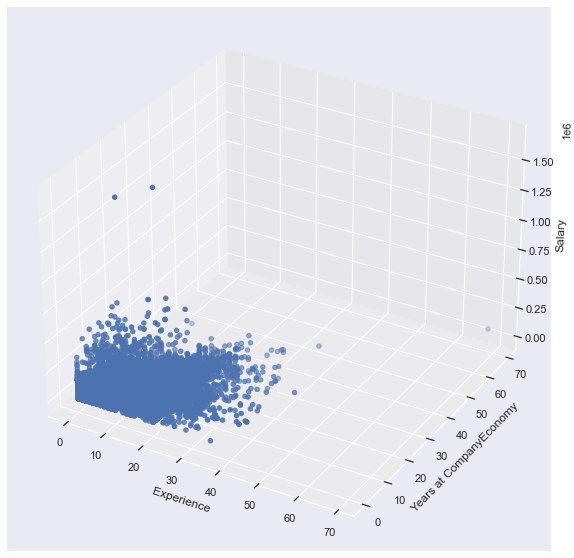

In [18]:

sns.set(style = "darkgrid")
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection = '3d')

x = df["yearsofexperience"]
y = df["yearsatcompany"]
z = df["basesalary"]

ax.set_xlabel("Experience")
ax.set_ylabel("Years at CompanyEconomy")
ax.set_zlabel("Salary")

ax.scatter(x, y, z)

plt.show()


In [70]:
#One-Way ANOVA
from scipy import stats

df[['basesalary','title']].groupby('title').mean()
pm = df[df.title=='Product Manager']['basesalary']
se = df[df.title=='Software Engineer']['basesalary']
sem = df[df.title=='Software Engineering Manager']['basesalary']
ds = df[df.title=='Data Scientist']['basesalary']
sa = df[df.title=='Solution Architect']['basesalary']
tpm = df[df.title=='Technical Program Manager']['basesalary']
hr = df[df.title=='Human Resources']['basesalary']
pd = df[df.title=='Product Designer']['basesalary']
m = df[df.title=='Marketing']['basesalary']
ba = df[df.title=='Business Analyst']['basesalary']
he = df[df.title=='Hardware Engineer']['basesalary']
s = df[df.title=='Sales']['basesalary']
r = df[df.title=='Recruiter']['basesalary']
me = df[df.title=='Mechanical Engineer']['basesalary']
mc = df[df.title=='Management Consultant']['basesalary']

f_statistic, p_value = stats.f_oneway(pm,se,sem,ds,sa,tpm,hr,pd,m,ba,he,s,r,me,mc)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))
#F_Statistic: 69.19167101209159, P-Value: 4.515360685161322e-27

from statsmodels.formula.api import ols
model_name = ols('basesalary ~ C(title)', data=df).fit()
model_name.summary()

F_Statistic: 167.55968473490375, P-Value: 0.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             basesalary   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     167.6
Date:                Mon, 21 Mar 2022   Prob (F-statistic):               0.00
Time:                        00:04:55   Log-Likelihood:            -7.7834e+05
No. Observations:               62642   AIC:                         1.557e+06
Df Residuals:                   62627   BIC:                         1.557e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                 1.035e+05   2025.549     51.100      0.000    9.95e+04    1.07e+05
C(title)[T.Data Scientist]                3.455e+04   2347.619     14.717      0.000    2.99e+04    3.92e+04
C(title)[T.Hardware Engineer]             3.612e+04   2398.607     15.060      0.000    3.14e+04    4.08e+04
C(title)[T.Human Resources]               2.509e+04   3752.091      6.686      0.000    1.77e+04    3.24e+04
C(title)[T.Management Consultant]         3.269e+04   2796.991     11.688      0.000    2.72e+04    3.82e+04
C(title)[T.Marketing]                     3.745e+04   3035.946     12.336      0.000    3.15e+04    4.34e+04
C(title)[T.Mechanical Engineer]           1.495e+04   3393.096      4.406      0.000    8299.543    2.16e+04
C(title)[T.Product Designer]              3.366e+04   2549.114     13.204      0.000    2.87e+04    3.87e+04
C(title)[T.Product Manager]               4.516e+04   2209.043     20.443      0.000    4.08e+04    4.95e+04
C(title)[T.Recruiter]                     1.399e+04   3486.244      4.013      0.000    7158.545    2.08e+04
C(title)[T.Sales]                         1.497e+04   3461.106      4.324      0.000    8181.857    2.17e+04
C(title)[T.Software Engineer]             2.891e+04   2047.172     14.122      0.000    2.49e+04    3.29e+04
C(title)[T.Software Engineering Manager]   7.07e+04   2262.792     31.244      0.000    6.63e+04    7.51e+04
C(title)[T.Solution Architect]            3.667e+04   2690.940     13.627      0.000    3.14e+04    4.19e+04
C(title)[T.Technical Program Manager]     5.295e+04   2594.633     20.407      0.000    4.79e+04     5.8e+04
==============================================================================
Omnibus:                    26748.436   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1190142.393
Skew:                           1.334   Prob(JB):                         0.00
Kurtosis:                      24.186   Cond. No.                         41.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""